# Inspect 3D dataset with napari
[napari](https://napari.org/stable/) is a Python library for n-dimensional image visualisation, annotation, and analysis.

Load `HDF5` dataset

In [6]:
h5file = "/mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5"
projs, _, _, _ = dxchange.read_aps_32id(h5file, sino=(800, 820, 1), proj=(500, 700, 1), exchange_rank=0)

INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5
INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5
INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5
ERROR:dxchange.reader:Unrecognized hdf5 dataset: "exchange/theta"
INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5
INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5
INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/BEATS_first_scan-20230511T170626/BEATS_first_scan-20230511T170626.h5


In [2]:
import napari

In [7]:
viewer = napari.view_image(projs)

![napari viewer](examples/img/napari.png)
<p style=\"text-align: center;\"> <em> napari image viewer - first BEATS scan </em> </p>

In [12]:
import napari

In [13]:
viewer = napari.view_image(projs)

In [15]:
print(projs[:, :, :].shape[:])
print(darks[:, :, :].shape[:])
print(projs.dtype)

(401, 100, 1216)
(41, 100, 1216)
float32


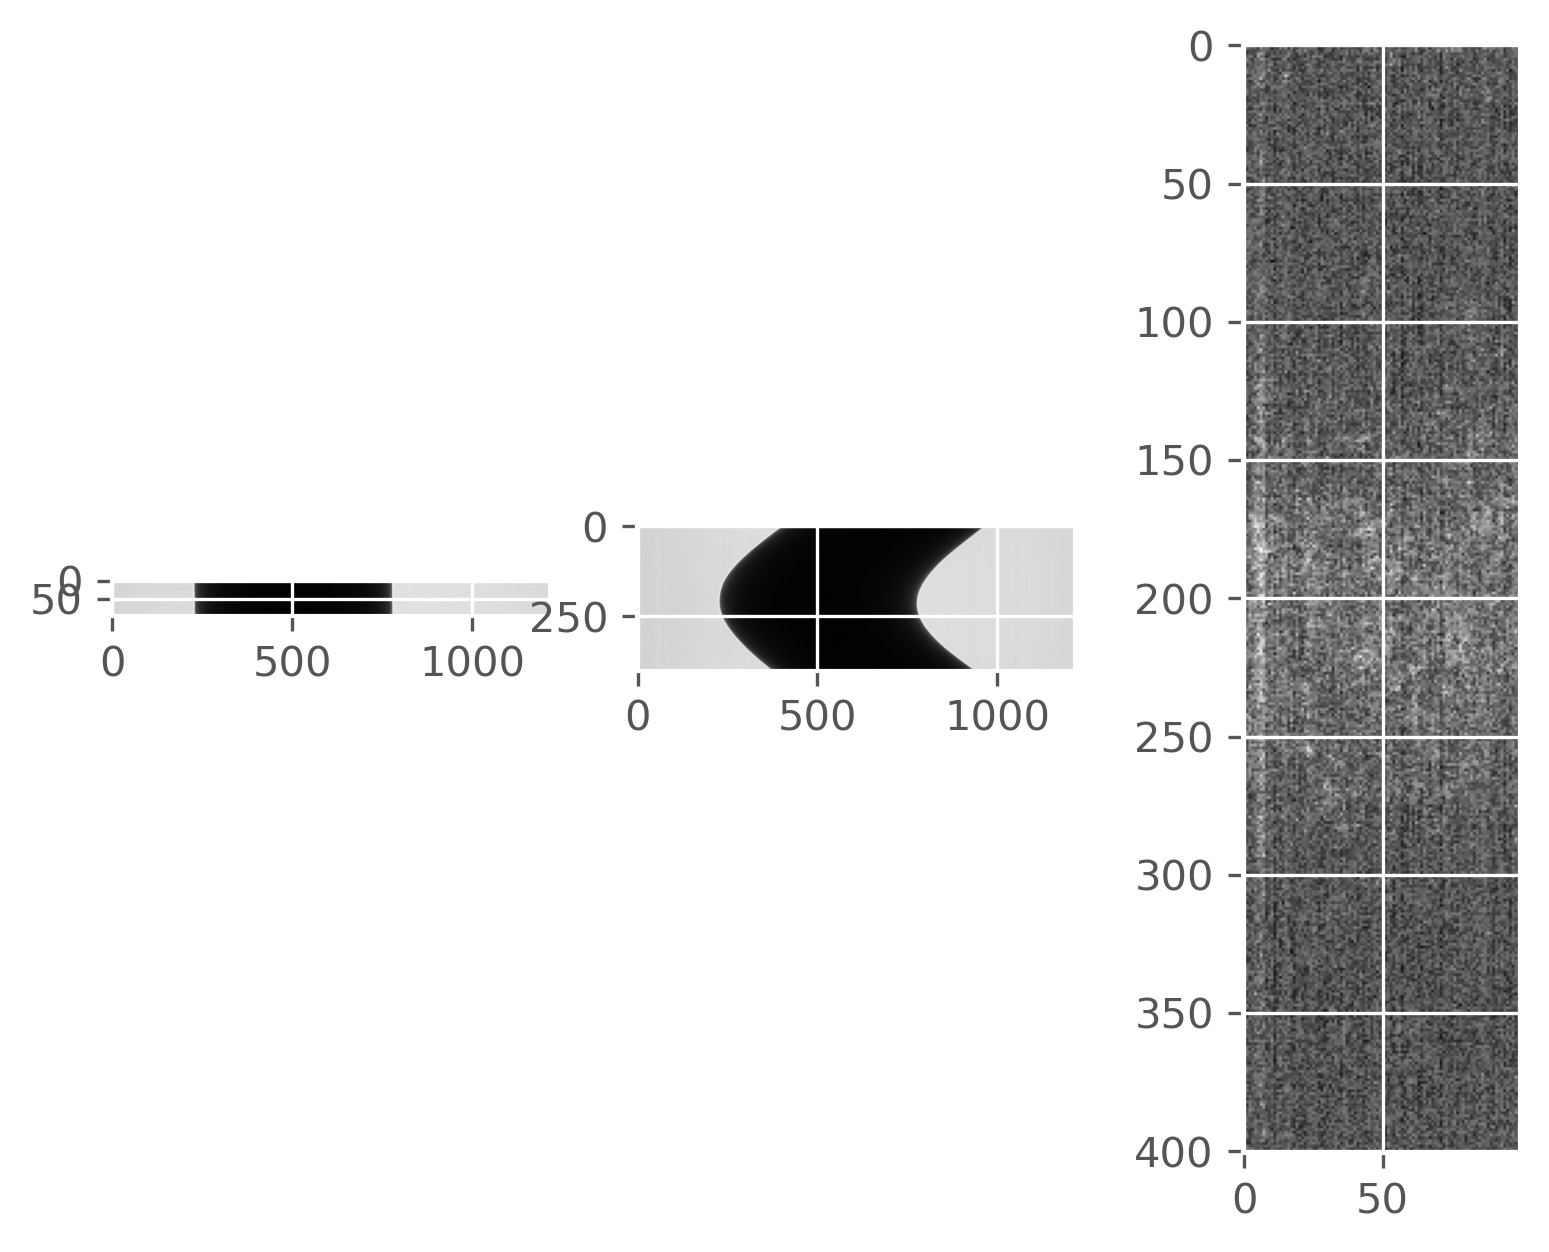

In [10]:
ru.plot_midplanes(projs)

In [10]:
ru.writemidplanes(projs, recon_dir+'/slice_tiff')

#### Read theta array from encoder readout

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case, theta is set as equally spaced between 0-180 degrees.

In [11]:
theta2 = tomopy.angles(projs.shape[0])

In [ ]:
theta_readout = dxchange.read_hdf5(h5file, '/exchange/theta_readout')

INFO:dxchange.reader:Data successfully imported: /mnt/PETRA/SED/BEATS/IH/Transbond_XT_35c-20230615T150109/Transbond_XT_35c-20230615T150109.h5


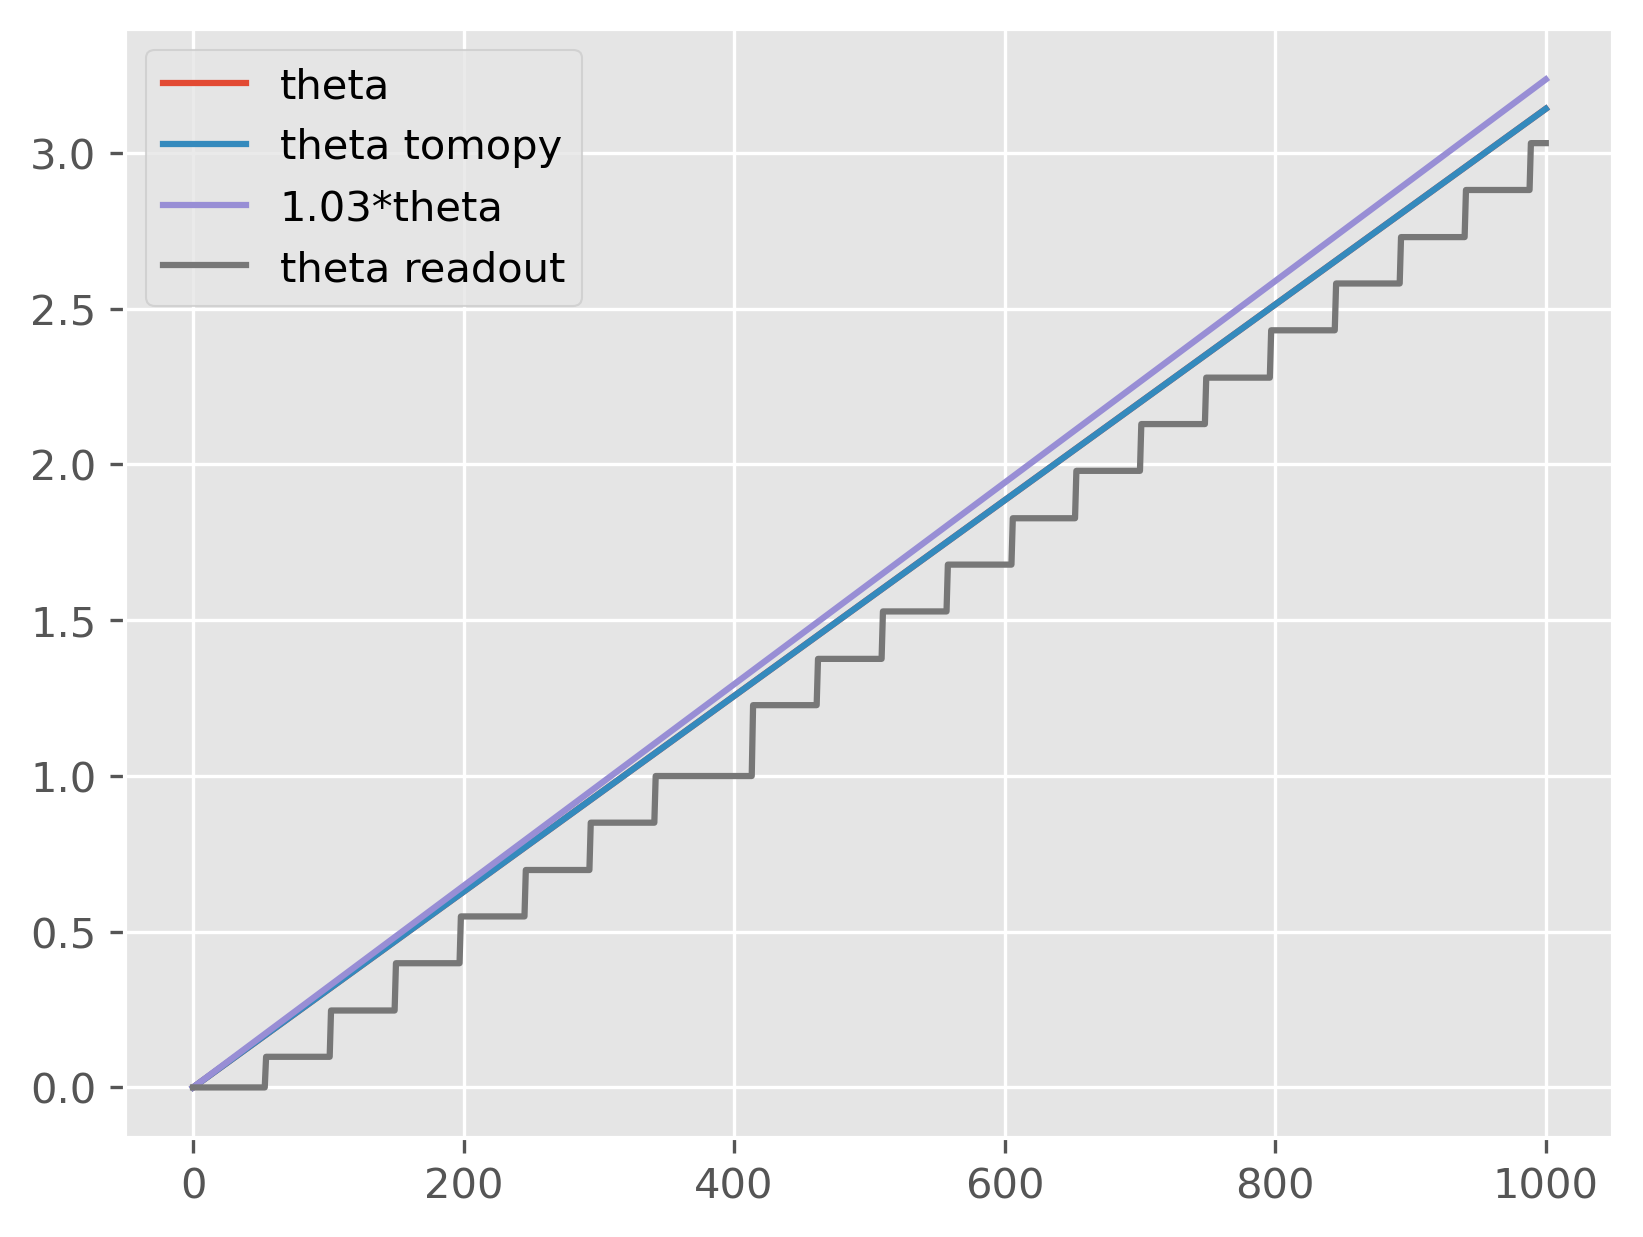

In [13]:
plt.plot(theta, label='theta')
plt.plot(theta2, label='theta tomopy')
plt.plot(1.03*theta, label='1.03*theta')
plt.plot(theta_readout/180*np.pi, label='theta readout')
plt.legend()

In [18]:
if theta is None:
    theta = tomopy.angles(projs.shape[0])